In [3]:
# pour afficher des images dans des cellules de code
# oui PycharmPro a un probleme pour les affichers dans le markdown

from IPython.display import Image

# Scrapper avec BeautifulSoup en action
## Récupération de toutes les bouteilles avec leurs prix et autres infos sur le site :
### Champagnes.terroir.fr


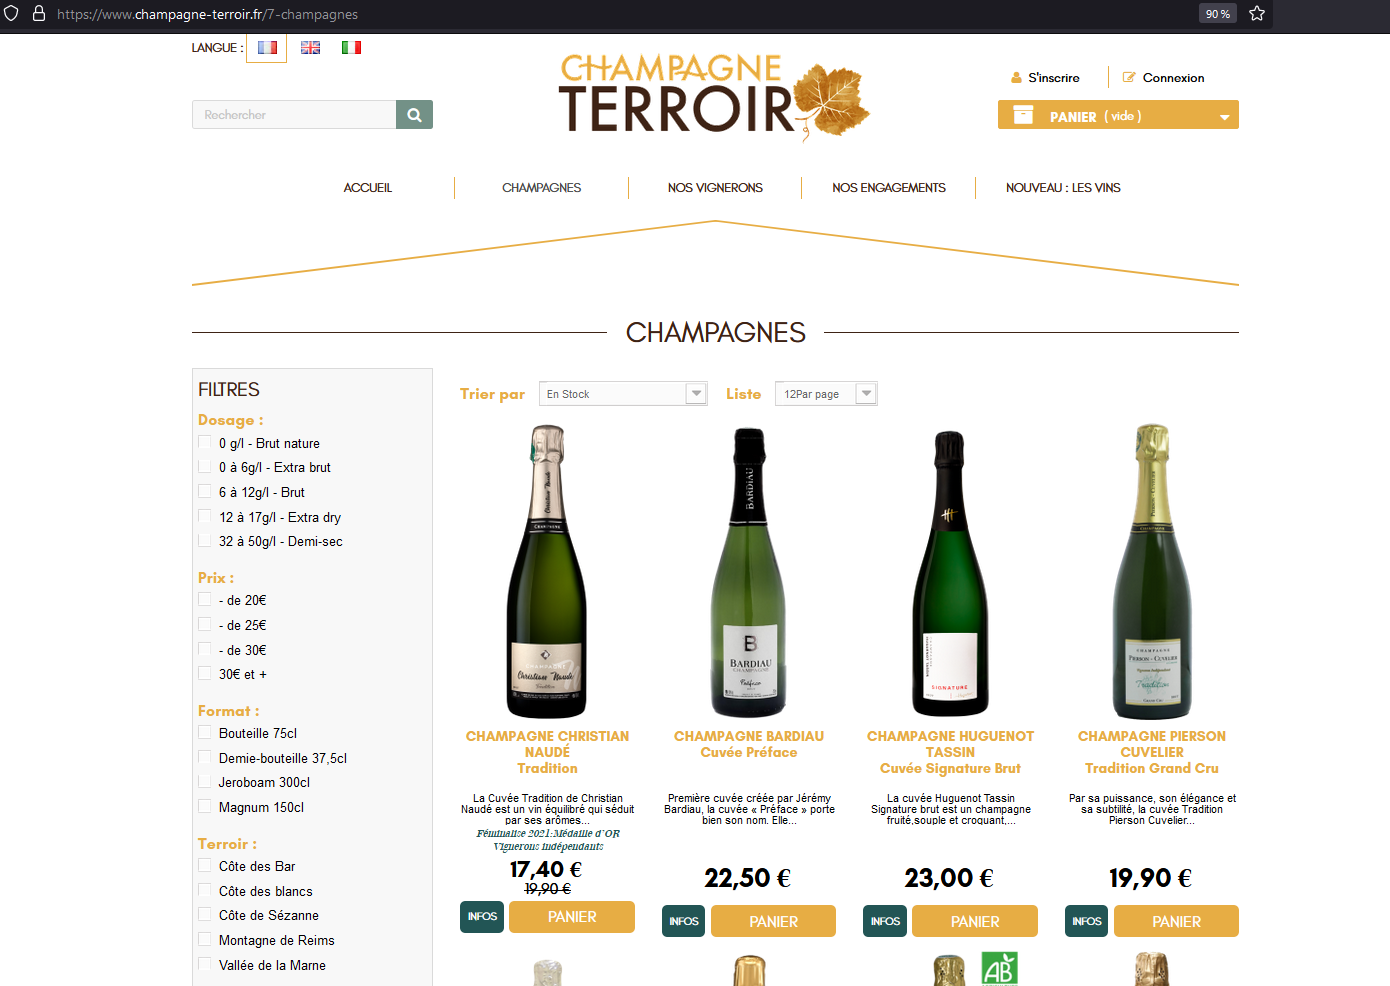

In [7]:
Image(filename='images/acceuil.PNG')

In [5]:
# Cool on a le site et ce qu'il faut récupérer, maintenant, du code °‿‿°

# les 2 librairies Python nécessaires :
##   bs4 pour faire toute la tambouille du Html pour ensuite la récupérer
##   request, pour requeter un site internet grace au protocole HTTP


from bs4 import BeautifulSoup
import requests


# 1er étape : Rentrer les infos du site dans le programme python

In [6]:
url = "https://www.champagne-terroir.fr/7-champagnes"
req = requests.get(url).text
soup = BeautifulSoup(req, 'html')

# 1er étape ✓

- l'url dans une variable,
- request est allez la chercher puis la traduite en un bloc de texte
- et enfin BeautifulSoup a parser (= mis au format voulu, ici le html)

# 2eme étape : que récupérer, et comment le faire ᕦ(ò_óˇ)ᕤ

- l'inspecteur
- choisir les bonnes balises

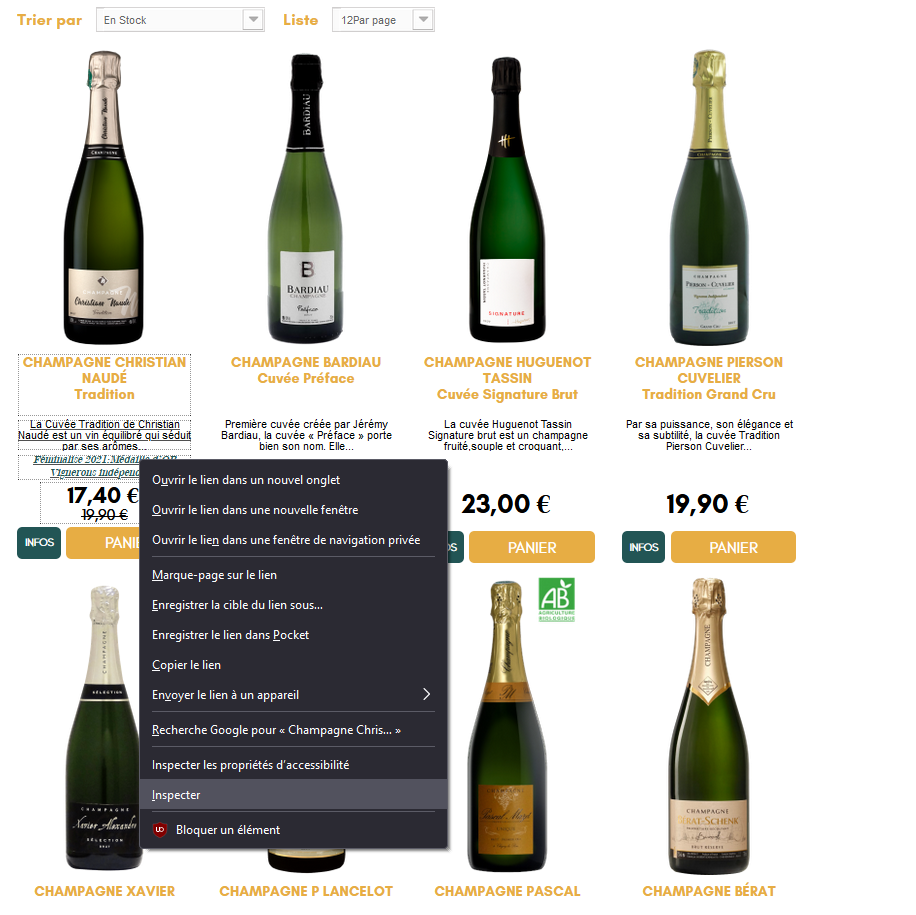

In [8]:
# clic droit sur un élement de la page,
# ici le prix, pour avoir directement l'information sur une zone précise d'un item

Image(filename='images/inspector.png')

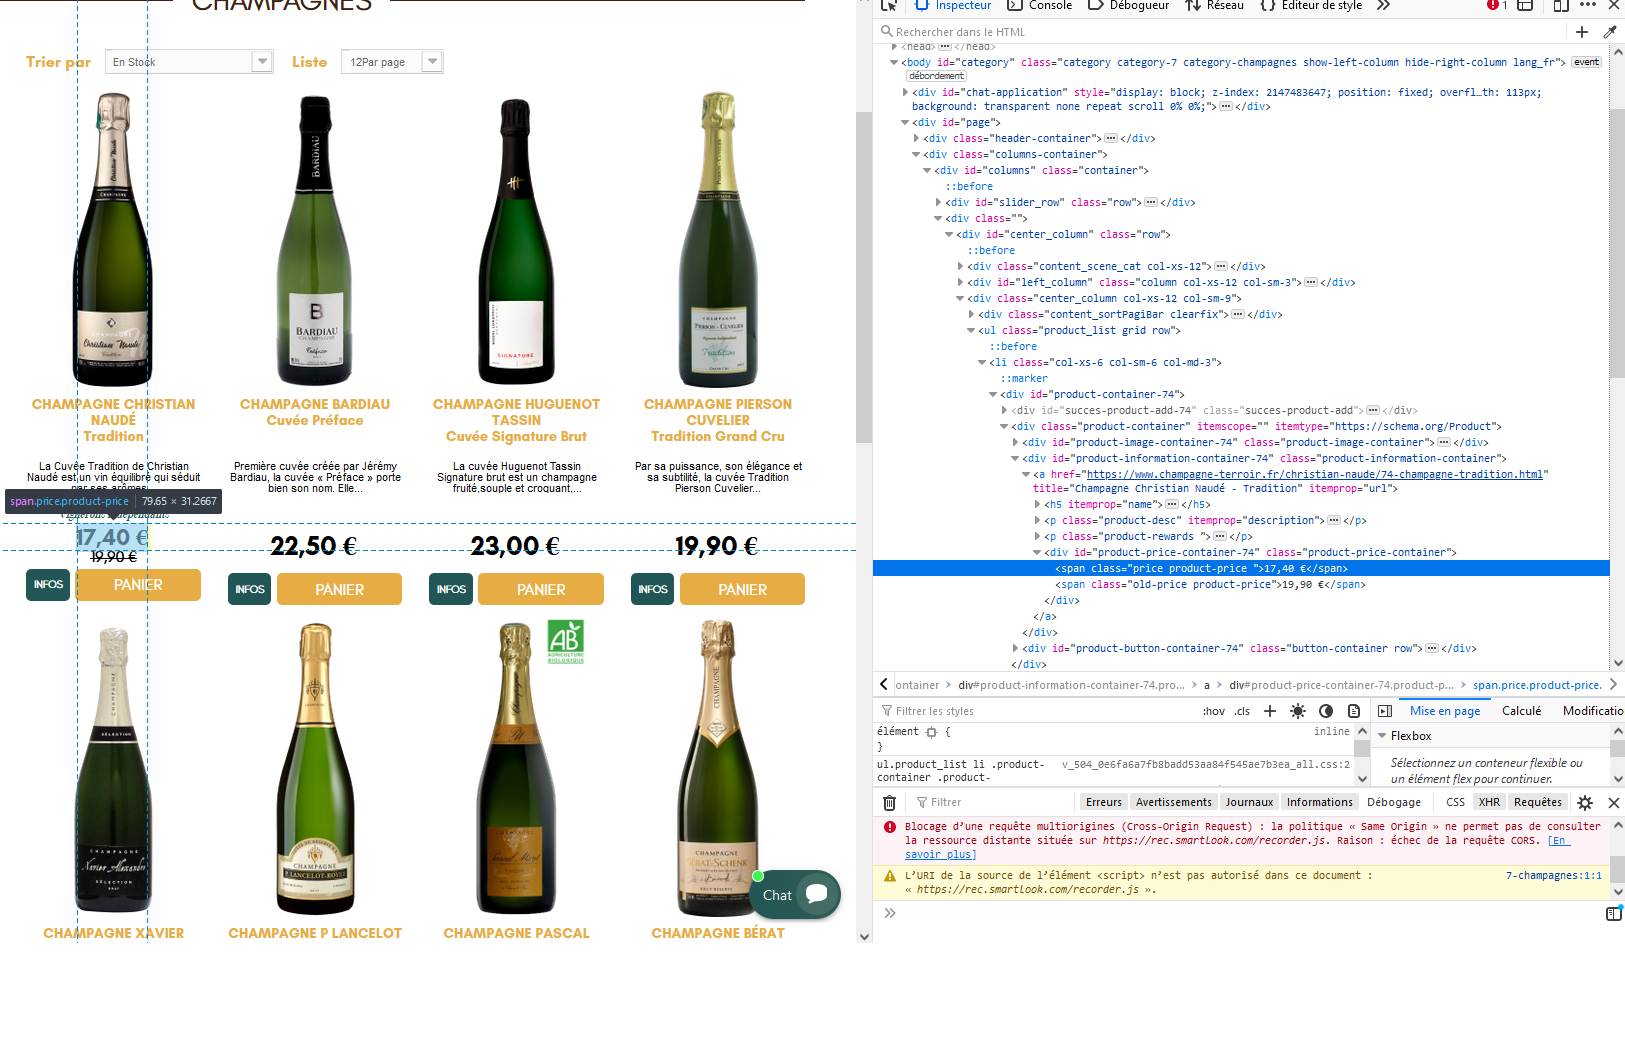

In [9]:
# qui ouvre ceci dans le navigateur

Image(filename='images/span_prix.png')

Avec l'intentation de l'inspecteur il est facile de voir jusqu'a quel moment le "parent"
qui englobe tout les items voulu s'arrete

petit indice : il y a un <ul class="product_list"\>, donc ca indique bien un tableau,
qui dit tableau, dit plusieurs élements

In [16]:
# find_all, qui permet comme son nom l'indique de prendre toutes les balises contenant notre objet


bouteilles = soup.find_all('div', class_='product-container')


# un print(bouteilles) affiche un bloc de texte immense,
# toutes les infos que l'on voit dans l'inspecteur t(-_-t)

### Exploration des balises dans nos objets capturés
###### pour que ce soit plus agréable en test, réduction de la soup a ses 3 premiers éléments

###### rappel de où on se trouve et ce que l'on cherche (c'est pour un objet, il y en a 12 par pages)

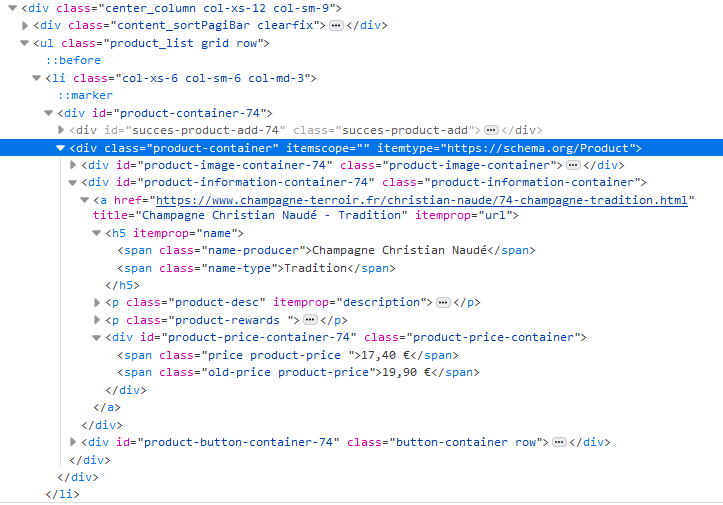

In [54]:
Image(filename='images/parents.PNG')

In [53]:
# c'est tout simple, on prend le nom et on demande a Python de tous les montrers ? (っ˘ڡ˘ς)

# testons alors, vu que find_all a créé une liste, une boucle for est nécessaire
# un premier print() qui permet de séparer l'affichage, aussi non tout sera ligne à ligne

for i in bouteilles[0:3]:
    print('**')
    print(i.find('h5'))

**
<h5 itemprop="name">
<span class="name-producer">Champagne Christian Naudé </span>
<span class="name-type"> Tradition</span>
</h5>
**
<h5 itemprop="name">
<span class="name-producer">Champagne Bardiau </span>
<span class="name-type"> Cuvée Préface</span>
</h5>
**
<h5 itemprop="name">
<span class="name-producer">Champagne Huguenot Tassin </span>
<span class="name-type"> Cuvée Signature Brut</span>
</h5>


ça ç l'air de fonctionner, mais a moitier, si on doit nétoyer tout ce qu'on a obtenu pour avoir un résultat propre

###### même si la premiere fois que j'ai utilisé bs4 je n'ai pas bien lu la doc, et était tombé a coté de .text <br> et j'avais utilisé la méthode strip() pour avoir le texte à l'intérieur des balises   щ（ﾟДﾟщ）

In [58]:
for i in bouteilles[0:3]:
    print('**')
    print(i.find('h5').text)

**

Champagne Christian Naudé 
 Tradition

**

Champagne Bardiau 
 Cuvée Préface

**

Champagne Huguenot Tassin 
 Cuvée Signature Brut



In [59]:
# c'est mieux, mais toujours pas optimal, en effet il y'a 2 span a l'intérieur du h5, autant les utilisers

for i in bouteilles[0:3]:
    print('')
    print(i.find('span', class_='name-producer').text)
    print(i.find('span', class_='name-type').text)


Champagne Christian Naudé 
 Tradition

Champagne Bardiau 
 Cuvée Préface

Champagne Huguenot Tassin 
 Cuvée Signature Brut


### Pour finir le choix des balises voulus,
- le nom du producteur
- la cuvée
- le prix

Et pour le dernier, on voit sur l'image qu'il y a 2 prix pour la 1er bouteille, le prix promo et le prix sans promo
donc on se doute bien que ça ne va pas être aussi simplissime que les deux autres

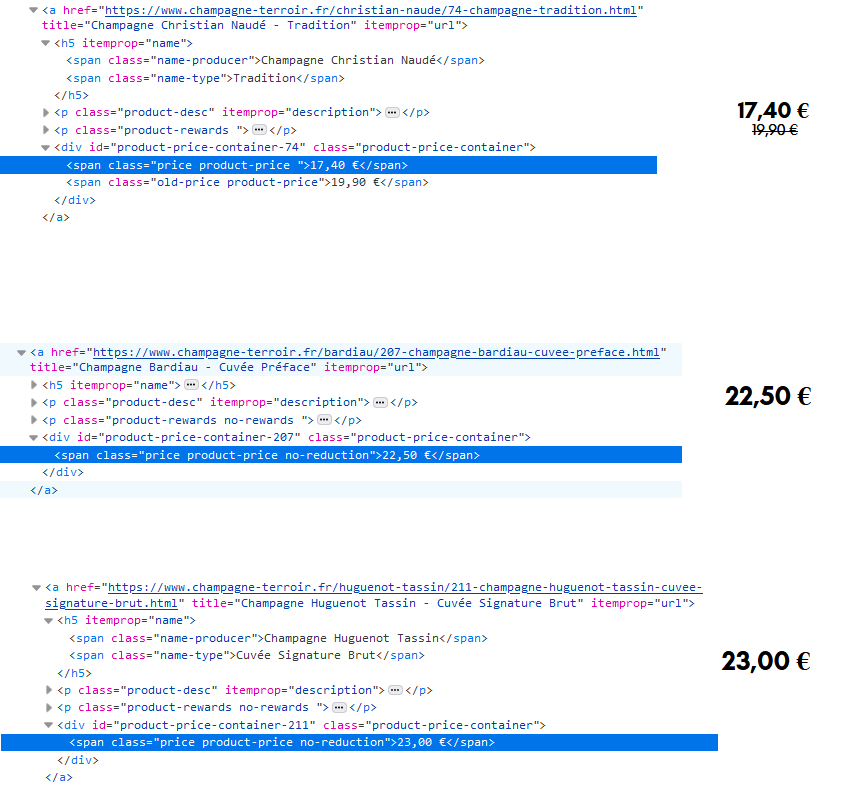

In [60]:
Image(filename='images/promo_pasPromos.png')

In [67]:
# Il y'a bien deux patern, testons donc

for i in bouteilles[0:3]:
    print(i.find('span', class_='price product-price'))

<span class="price product-price">
          17,40 €
        </span>
None
None


En effet, c'est logique, la balise demandé n'existe pas tout le temps dans l'item de la soup, <br>
vouloir afficher .text du résultat entrainera une error, en effet, Python ne va pas comprendre <br><br>
"pourquoi tu veux que j'affiche du texte alors qu'il n'y a rien ლ(•́•́ლ)"

In [68]:
# Allez une condition simple, si la balise prix normal n'existe pas, ca veut dire que c'est en promo

for i in bouteilles[0:3]:
    if i.find('span', class_='price product-price no-reduction') == None:
        print(i.find('span', class_='price product-price').text)
    else:
        print(i.find('span', class_='price product-price no-reduction').text)


          17,40 €
        

          22,50 €
        

          23,00 €
        


# Etape 2 ✓
- comprendre à minima l'arborescence du html
- afficher seulement le contenu désiré

### Toute l'étape 2 n'aura été que de l'affichage, en effet dans les boucles for ce n'étaient que des print()

Interlude : afficher les valeurs dans un tableau

###### la suite du scraping demande de passer de pages en pages, on continue apres

# 3eme Etape :
- garder les données
- les mettres dans un tableur

In [69]:
# Pour faire des tableaux en python, il nous faut une librairie spécialisé dans les données, donc PANDAS ヽ(´▽`)/

import pandas as pd

In [71]:
# des listes pour recevoir toutes les données qui arrivent :

noms_producteur = []
noms_cuvees = []
prix = []

In [72]:
for infos in bouteilles[0:3]:

    # on met dans une variable le résultat, qu'on ajoute ensuite à la liste
    producteur = infos.find('span', class_='name-producer').text
    noms_producteur.append(producteur)

    # pareil pour les autres informations
    cuvees = infos.find('span', class_='name-type').text
    noms_cuvees.append(cuvees)

    # la condition pour les prix
    if infos.find('span', class_='price product-price no-reduction') == None:
        prixs = infos.find('span', class_='price product-price').text
        prix.append(prixs)

    else:
        prixs = infos.find('span', class_='price product-price no-reduction').text
        prix.append(prixs)

In [73]:
# vérification
noms_producteur

['Champagne Christian Naudé ',
 'Champagne Bardiau ',
 'Champagne Huguenot Tassin ']

In [74]:
# pour les prix
prix

['\n          17,40 €\n        ',
 '\n          22,50 €\n        ',
 '\n          23,00 €\n        ']

Presque, il y'a les \n qui sont restés (retour à la ligne), <br>
pas grave de toute facon il faudra nétoyer la virgule et le symbole € plus tard <br>
Voyons ca dans un tableau

In [75]:
# une méthode pour créer un dataframe {'noms_colone' : liste_1, 'col2' : liste_2}

champagnes = pd.DataFrame({'Domaine' : noms_producteur,
                           'Cuvée' : noms_cuvees,
                           'Prix' : prix})

In [76]:
champagnes

,Domaine,Cuvée,Prix
0,Champagne Christian Naudé,Tradition,"\n 17,40 €\n"
1,Champagne Bardiau,Cuvée Préface,"\n 22,50 €\n"
2,Champagne Huguenot Tassin,Cuvée Signature Brut,"\n 23,00 €\n"


# Etape 3 ✓
- Enfin du concret, on peut utiliser les informations voulus
- PANDAS (ᵔᴥᵔ)

### Maintenant que la page a été scrapé, il faut récupérer les infos des autres pages

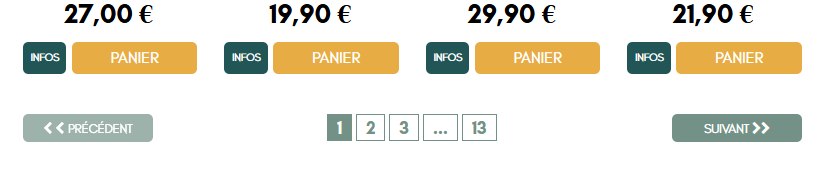

In [77]:
Image(filename='images/pages_suiv.PNG')

# 4eme Etape :
- Recupérer les pages suivantes

pour se faire, il faut changer l'url de la requete la rendre dynamique l'url pour pouvoir itérer dessus
<br> vérification si l'url de la pages 2 est identique

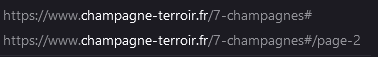

In [78]:
Image(filename='images/deux_pages.png')

L'url de la pages 1 a eu un # en plus que tout a l'heure, car en remplacant le 'page-2' par 'page-1' <br>
la page a bien été actualisé, mais le # a été ajouté, ce qu'il faut retenir : /page-1 fonctionne

In [96]:
import time

In [106]:
# reset des listes pour les réutilisés

noms_producteur = []
noms_cuvees = []
prix = []


# 13 pages maximum donc une boucle avec 13 en stop

for pages in range(1, 14):
    url = f"https://www.champagne-terroir.fr/7-champagnes#/page-{pages}"
    req = requests.get(url).text
    soup = BeautifulSoup(req, 'html')

    # renseigner l'objet a chercher une fois arrivé sur la page
    bouteilles = soup.find_all('div', class_='product-container')

    # et maintenant le scrap de la page choisi
    for infos in bouteilles:
        producteur = infos.find('span', class_='name-producer').text
        noms_producteur.append(producteur)

        cuvees = infos.find('span', class_='name-type').text
        noms_cuvees.append(cuvees)

        if infos.find('span', class_='price product-price no-reduction') == None:
            prixs = infos.find('span', class_='price product-price').text
            prix.append(prixs)

        else:
            prixs = infos.find('span', class_='price product-price no-reduction').text
            prix.append(prixs)



In [109]:
# vérification
noms_producteur[:25]

['Champagne Christian Naudé ',
 'Champagne Bardiau ',
 'Champagne Huguenot Tassin ',
 'Champagne Pierson Cuvelier ',
 'Champagne Xavier ALEXANDRE ',
 'Champagne P Lancelot Royer ',
 'Champagne Pascal Mazet ',
 'Champagne Bérat Schenk ',
 'Champagne Huguenot Tassin ',
 'Champagne Gratiot Pillière ',
 'Champagne Huguenot Tassin ',
 'Champagne Bergeronneau Marion ',
 'Champagne Christian Naudé ',
 'Champagne Bardiau ',
 'Champagne Huguenot Tassin ',
 'Champagne Pierson Cuvelier ',
 'Champagne Xavier ALEXANDRE ',
 'Champagne P Lancelot Royer ',
 'Champagne Pascal Mazet ',
 'Champagne Bérat Schenk ',
 'Champagne Huguenot Tassin ',
 'Champagne Gratiot Pillière ',
 'Champagne Huguenot Tassin ',
 'Champagne Bergeronneau Marion ',
 'Champagne Christian Naudé ']

In [112]:
# double vérification, juste la page 2 tout seul

url = "https://www.champagne-terroir.fr/7-champagnes#/page-2"
req = requests.get(url).text
soup = BeautifulSoup(req, 'html')

bouteilles = soup.find_all('div', class_='product-container')

for infos in bouteilles:
    print(infos.find('span', class_='name-producer').text)


Champagne Christian Naudé 
Champagne Bardiau 
Champagne Huguenot Tassin 
Champagne Pierson Cuvelier 
Champagne Xavier ALEXANDRE 
Champagne P Lancelot Royer 
Champagne Pascal Mazet 
Champagne Bérat Schenk 
Champagne Huguenot Tassin 
Champagne Gratiot Pillière 
Champagne Huguenot Tassin 
Champagne Bergeronneau Marion 


# Etape 4 ✗ : BeautifulSoup a été vaincu par le JavaScript et le CORS

# Etape 5 : Trouver une alternative
- améliorer le script pour le faire fonctionner coute que coute (je viens d'y passer presque 2h pas vu l'erreur)<br>
comme mettre des sleeps entre chaque pages, essayer de récuperer les informations de la pages 2 uniquement

- essayer une autre méthode ᕦ(ò_óˇ)ᕤ

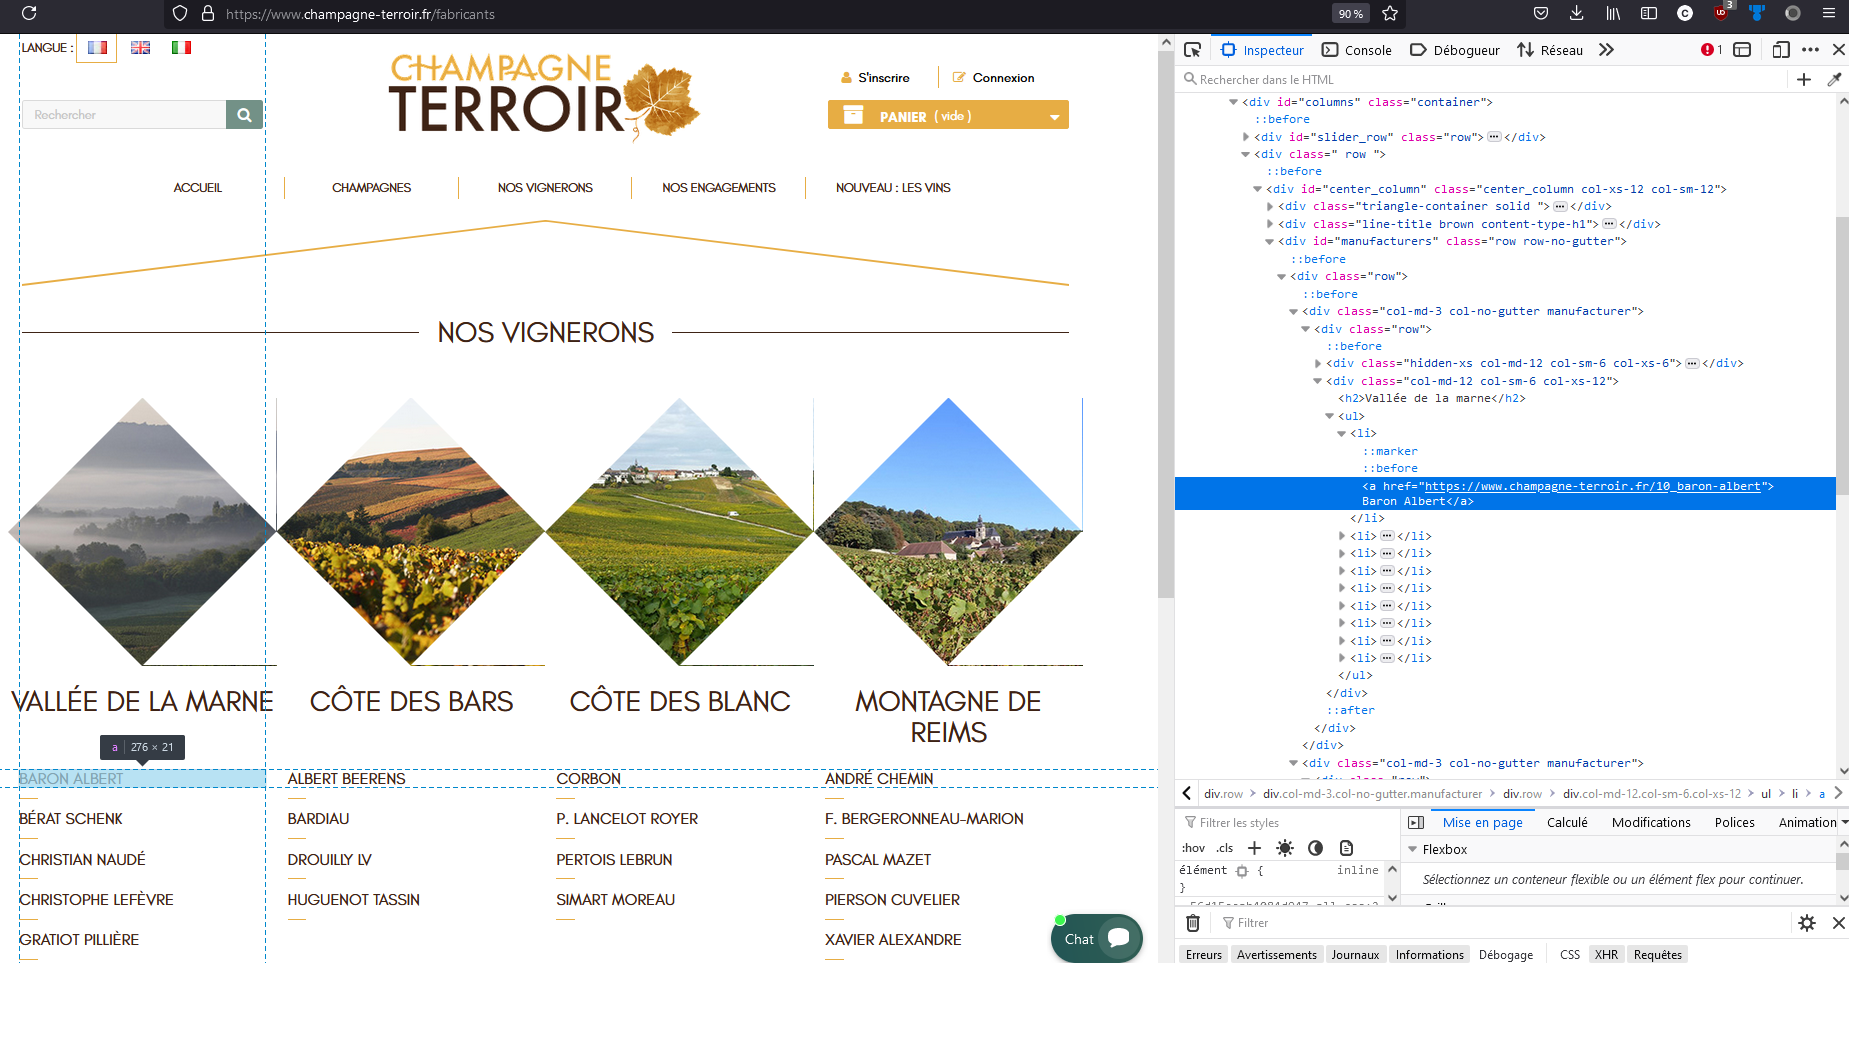

In [110]:
Image(filename='images/vignerons.png')

Les quatres terroirs sont créés de la même maniere, donc récupération de l'url unique de tout les vigenrons, <br>
pour ensuite, sur leurs pages récupérer les bouteilles

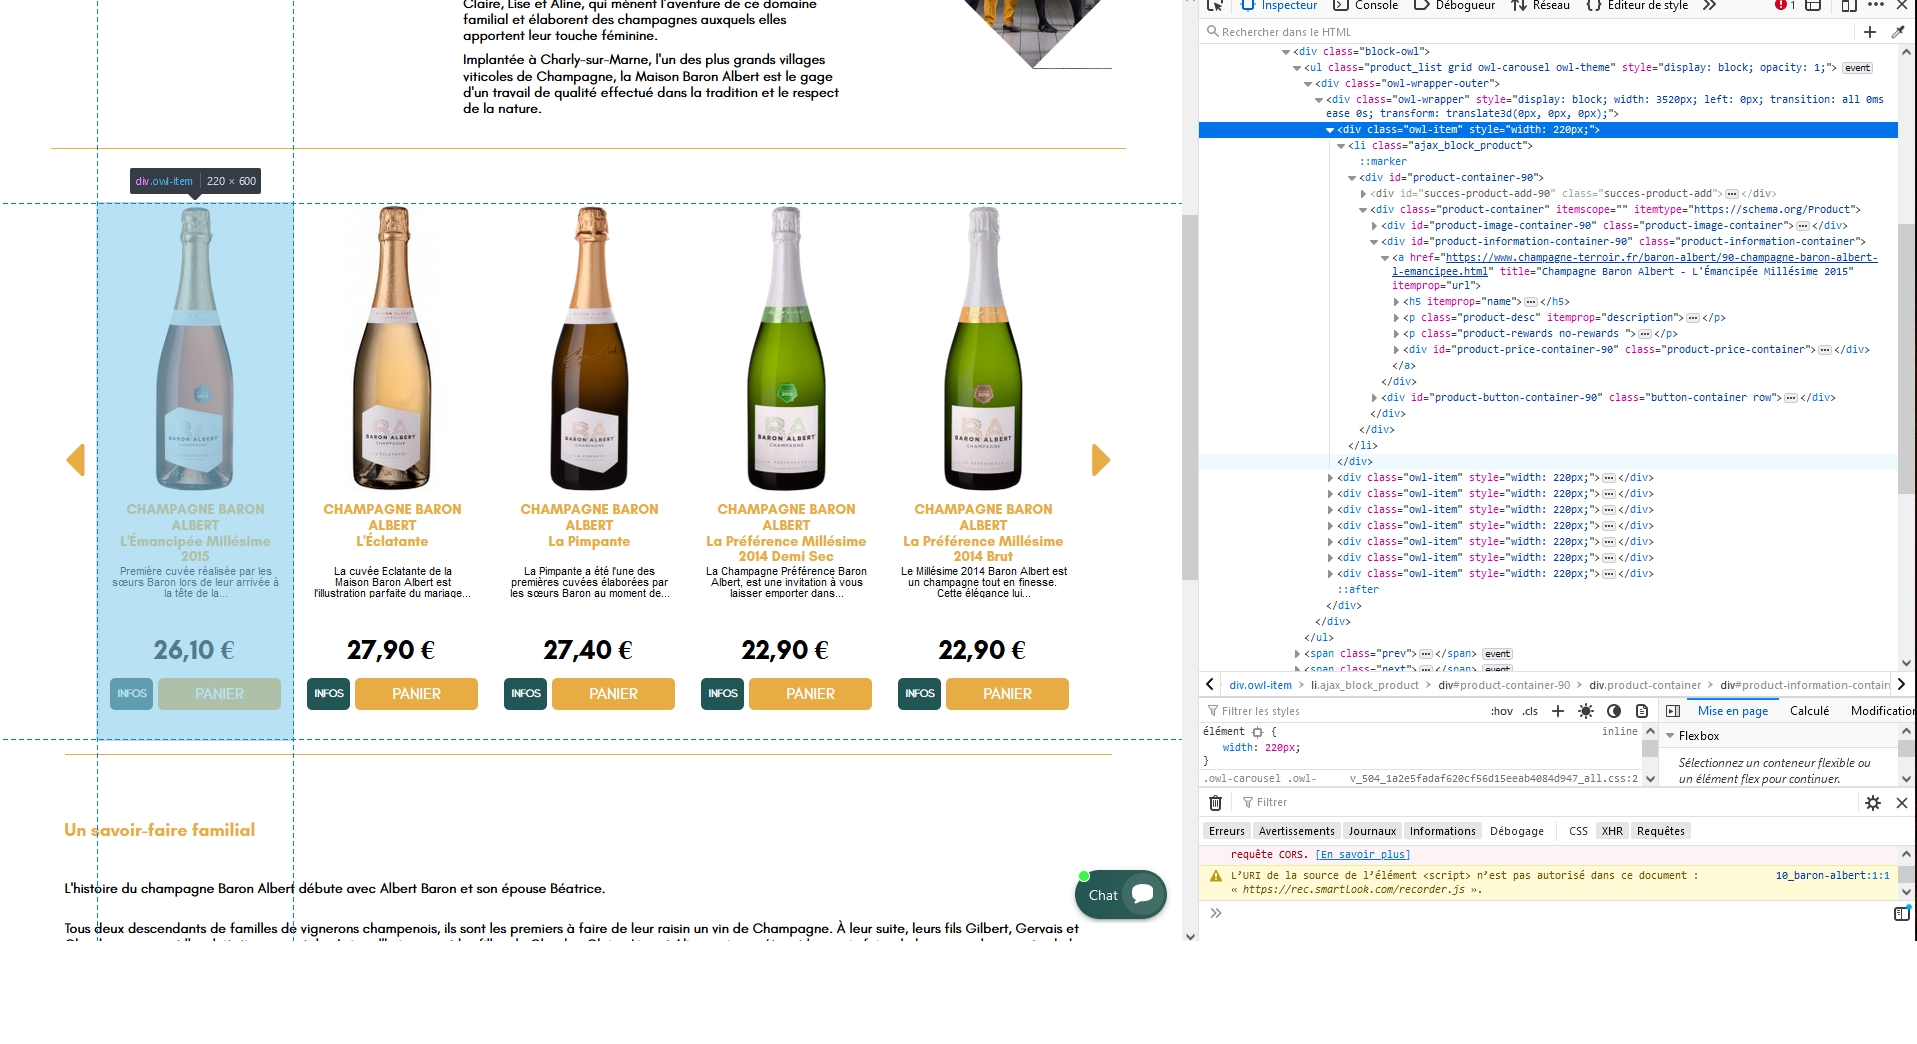

In [111]:
Image(filename='images/bout_par_vignerons.png')

In [116]:
url = 'https://www.champagne-terroir.fr/fabricants'
req = requests.get(url).text
soup = BeautifulSoup(req, 'html')

In [174]:
# TODO
# mettre les noms en fonction du terroir

Terroirs = {}

terroirs = soup.find_all('div', class_='col-md-3 col-no-gutter manufacturer')

for i in terroirs:
    print('*')
    print(i.find('h2').text)
    print('**')
    for a in i.find_all('a'):
        Terroirs[i.find('h2').text] = [a.text]
        print(a.text)


*
Vallée de la marne
**
Baron Albert
Bérat Schenk
Christian Naudé
Christophe Lefèvre
Gratiot Pillière
Louis Casters
Mulette Corbon
Robert Allait
Sourdet Diot
*
Côte des bars
**
Albert Beerens
Bardiau
Drouilly LV
Huguenot Tassin
*
Côte des blanc
**
Corbon
P. Lancelot Royer
Pertois Lebrun
Simart Moreau
*
Montagne de reims
**
André Chemin
F. Bergeronneau-Marion
Pascal Mazet
Pierson Cuvelier
Xavier ALEXANDRE


In [167]:
# TODO" : n'affiche que la derniere itération
Terroirs

{'Vallée de la marne': ['Sourdet Diot'],
 'Côte des bars': ['Huguenot Tassin'],
 'Côte des blanc': ['Simart Moreau'],
 'Montagne de reims': ['Xavier ALEXANDRE']}

In [170]:
# récupération des liens

liens_vignerons = []

liens = soup.find_all('div', class_='col-md-3 col-no-gutter manufacturer')

# dans les 3 colonnes, récupères toutes les balises liens, et extraits l'attribut
# car le texte de la balise = le nom du vignerons, l'attribut = le lien dans le site

for i in liens:
    for a in i.find_all('a'):
        liens_vignerons.append(a.attrs['href'])

In [179]:
# vérif
liens_vignerons[:4]

['https://www.champagne-terroir.fr/10_baron-albert',
 'https://www.champagne-terroir.fr/1_berat-schenk',
 'https://www.champagne-terroir.fr/2_christian-naude',
 'https://www.champagne-terroir.fr/12_christophe-lefevre']

In [180]:
# les infos de chaque bouteilles sont dans les même balises sur les pages des vignerons

noms_producteur = []
noms_cuvees = []
prix = []

# boucles dans la liste de tous les liens récupéré juste au dessus, puis la boucle de récup des infos

for lien in liens_vignerons:

    url = lien
    req = requests.get(url).text
    soup = BeautifulSoup(req, 'html')

    # renseigner l'objet a chercher une fois arrivé sur la page
    bouteilles = soup.find_all('div', class_='product-container')

    # et maintenant le scrap de la page choisi
    for infos in bouteilles:
        producteur = infos.find('span', class_='name-producer').text
        noms_producteur.append(producteur)

        cuvees = infos.find('span', class_='name-type').text
        noms_cuvees.append(cuvees)

        if infos.find('span', class_='price product-price no-reduction') == None:
            prixs = infos.find('span', class_='price product-price').text
            prix.append(prixs)

        else:
            prixs = infos.find('span', class_='price product-price no-reduction').text
            prix.append(prixs)

In [183]:
# verif
# len() = donne la longeur de la liste


print(len(noms_producteur))
noms_producteur[:22]

143


['Champagne Baron Albert ',
 'Champagne Baron Albert ',
 'Champagne Baron Albert ',
 'Champagne Baron Albert ',
 'Champagne Baron Albert ',
 'Champagne Baron Albert ',
 'Champagne Baron Albert ',
 'Champagne Baron Albert ',
 'Champagne Bérat Schenk ',
 'Champagne Bérat Schenk ',
 'Champagne Bérat Schenk ',
 'Champagne Bérat Schenk ',
 'Champagne Bérat Schenk ',
 'Champagne Bérat Schenk ',
 'Champagne Bérat Schenk ',
 'Champagne Bérat Schenk ',
 'Champagne Bérat Schenk ',
 'Champagne Christian Naudé ',
 'Champagne Christian Naudé ',
 'Champagne Christian Naudé ',
 'Champagne Christian Naudé ',
 'Champagne Christian Naudé ']

In [184]:
# derniere vérification

print(len(noms_producteur))
print(len(noms_cuvees))
print(len(prix))

143
143
143


In [185]:
champagnes = pd.DataFrame({'Vigneron' : noms_producteur,
                           'Bouteille' : noms_cuvees,
                           'Prix' : prix})

In [186]:
champagnes

,Vigneron,Bouteille,Prix
0,Champagne Baron Albert,L'Émancipée Millésime 2015,"\n 26,10 €\n"
1,Champagne Baron Albert,L'Éclatante,"\n 27,90 €\n"
2,Champagne Baron Albert,La Pimpante,"\n 27,40 €\n"
3,Champagne Baron Albert,La Préférence Millésime 2014 Demi Sec,"\n 22,90 €\n"
4,Champagne Baron Albert,La Préférence Millésime 2014 Brut,"\n 22,90 €\n"
...,...,...,...
138,Champagne Xavier ALEXANDRE,Zéro Dosage 1er Cru,"\n 25,90 €\n"
139,Champagne Xavier ALEXANDRE,Rubis 1er Cru,"\n 24,90 €\n"
140,Champagne Xavier ALEXANDRE,Authentic'A 1er Cru,"\n 25,90 €\n"
141,Champagne Xavier ALEXANDRE,Blanc de Blancs 2013,"\n 27,90 €\n"


# Etape 5 ✓

# Champagne-terroir : vendangé ☜(⌒▽⌒)☞

## Bonus : Nétoyer la colonne prix, et voir le prix moyen du site

In [198]:
# replace, tiens bien son nom, puis convertion en nombre pour faire la moyenne

champagnes.Prix = champagnes.Prix.str.replace(',', '.').str.replace('€','').str.replace('\n' ,'')
champagnes.Prix = champagnes.Prix.astype(float)
champagnes

,Vigneron,Bouteille,Prix
0,Champagne Baron Albert,L'Émancipée Millésime 2015,26.10
1,Champagne Baron Albert,L'Éclatante,27.90
2,Champagne Baron Albert,La Pimpante,27.40
3,Champagne Baron Albert,La Préférence Millésime 2014 Demi Sec,22.90
4,Champagne Baron Albert,La Préférence Millésime 2014 Brut,22.90
...,...,...,...
138,Champagne Xavier ALEXANDRE,Zéro Dosage 1er Cru,25.90
139,Champagne Xavier ALEXANDRE,Rubis 1er Cru,24.90
140,Champagne Xavier ALEXANDRE,Authentic'A 1er Cru,25.90
141,Champagne Xavier ALEXANDRE,Blanc de Blancs 2013,27.90


In [202]:
champagnes.Prix.mean()

32.15657342657344

# Voila voila le prix d'achat moyen d'une bouteille sur le site "champagne-terroir' est de 32€

In [203]:
champagnes.to_csv('champagnes_terroirs.csv', index=False)